<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#HS300" data-toc-modified-id="HS300-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>HS300</a></span></li><li><span><a href="#新兴技术产业" data-toc-modified-id="新兴技术产业-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>新兴技术产业</a></span></li><li><span><a href="#概念提取和词云分析" data-toc-modified-id="概念提取和词云分析-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>概念提取和词云分析</a></span></li></ul></div>

In [125]:
import pandas as pd
import numpy as np 
from datetime import datetime
import matplotlib.cm  as cm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px

plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif']=['SimHei'] #指定默认字体 SimHei为黑体

In [126]:
final_300 = pd.read_csv(r'final_300.csv',encoding = "utf-8").set_index('Unnamed: 0')

In [127]:
final_300.head()

,net_profit_rate,NAME,LABEL,所属申万一级行业,LABEL_NAME,LABEL_2,LABEL2_NAME,LABEL_3,LABEL3_NAME,market_cap,gross_profit_margin,net_profit_margin,pe_ratio,roe,code,net_profit
Unnamed: 0,,,,,,,,,,,,,,,,
000625.XSHE,0.300629,长安汽车,1,汽车I,医药生物I,3,化学制品II,4,黄金II,1159.3241,17.39,5.63,40.9579,2.30,000625.XSHE,1.262110e+09
002129.XSHE,0.708484,中环股份,1,电气设备I,医药生物I,1,钢铁II,2,采掘服务II,1349.2488,19.09,12.16,44.9126,6.15,002129.XSHE,1.391143e+09
002709.XSHE,0.754718,天赐材料,1,化工I,医药生物I,3,化学制品II,1,银行II,1100.4397,43.47,28.25,70.1728,12.52,002709.XSHE,8.258869e+08
300003.XSHE,-3.188813,乐普医疗,1,医药生物I,医药生物I,4,化学纤维II,3,化学制品II,408.3767,61.86,9.33,23.3350,1.67,300003.XSHE,1.973108e+08
300316.XSHE,0.522642,晶盛机电,1,电气设备I,医药生物I,4,化学纤维II,4,黄金II,894.0999,40.38,30.30,61.8922,8.58,300316.XSHE,5.163302e+08


# HS300

In [128]:
##area=总市值；color=净利率
df = final_300
df = df[~df.isin([0])].dropna(axis=0)


fig = px.treemap(df, 
            path=['LABEL_NAME', 'LABEL2_NAME', 'LABEL3_NAME','NAME'],
            values='market_cap',
            color='net_profit_margin',
            range_color = [-20, 50],
            color_continuous_scale='Tealrose',
                height = 540,
                 width = 960)
fig.show()

In [129]:
grouped=df.groupby(["LABEL"])
pool1

,LABEL_NAME,net_profit_rate,LABEL,market_cap,gross_profit_margin,net_profit_margin,pe_ratio,roe,net_profit,NUM
0,农林牧渔I,-0.031027,6.000000,27576.3058,20.086667,4.378750,5.395504,-0.362917,1.497586e+09,24
1,化工I,-0.214311,7.000000,65424.4488,31.663529,13.758529,41.035818,4.716765,2.103153e+09,34
2,医药生物I,0.150861,1.563636,105693.8034,46.513455,30.496364,64.434542,6.391636,1.637744e+09,55
3,机械设备I,0.595104,4.000000,24627.2982,20.522500,8.424500,2.413110,2.641500,2.375731e+09,20
4,银行I,-0.080329,3.000000,26913.2085,27.551500,11.335000,29.913785,3.798500,3.665332e+09,20
5,非银金融I,0.327414,5.000000,61364.6408,33.919000,12.090000,42.062128,3.425200,9.849808e+08,50


In [130]:
df1=pd.DataFrame(df.groupby("LABEL_NAME").size()).reset_index()
df1.columns=["LABEL_NAME","NUM"]


fig = px.bar(df1, y='NUM', x='LABEL_NAME', text='NUM',title="一级行业股票数分布",
             labels={'LABEL_NAME':'LABEL_NAME','NUM':'NUM'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [131]:
fig = px.bar(df, y='market_cap', x='LABEL_NAME', text='market_cap',title="一级行业总市值分布",
             labels={'一级行业':'一级行业','总市值（亿元）':'总市值（亿元）'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [132]:
import pyecharts
from pyecharts.charts import *
from pyecharts.components import Table
from pyecharts import options as opts
from pyecharts.commons.utils import JsCode
from pyecharts.globals import ThemeType

In [133]:
ts_marketcap_300 = pd.read_csv(r'ts_marketcap_300.csv',encoding = "utf-8").set_index("LABEL_NAME")
ts_npro_300 = pd.read_csv(r'ts_npro_300.csv',encoding = "utf-8").set_index("LABEL_NAME")

In [134]:
ts_marketcap_300
index=list(ts_marketcap_300.index)
reindex=[]
for i in range(len(index)):
    if index[i] not in reindex:
        reindex.append(index[i])
    else:
        reindex.append(index[i]+"*")
ts_marketcap_300.index=reindex        

In [135]:
ts_npro_300
index=list(ts_npro_300.index)
reindex=[]
for i in range(len(index)):
    if index[i] not in reindex:
        reindex.append(index[i])
    else:
        reindex.append(index[i]+"*")
ts_npro_300.index=reindex        

In [136]:
def stackbar_mk(group):
    xdata = list(group.columns)
    yl = list(group.index)
    bar = ( Bar(init_opts=opts.InitOpts(
        )).add_xaxis(xdata)
        .set_series_opts(label_opts=opts.LabelOpts(is_show=False))
      .set_global_opts(title_opts=opts.TitleOpts(title='一级行业总市值变化',pos_left="center",pos_top="bottom"),
                     xaxis_opts=opts.AxisOpts(name='时间'),       
                     yaxis_opts=opts.AxisOpts(name='总市值'),
                    ))
           
    for i in range (0,len(yl)):
        ydata = list(group.iloc[i])
        bar.add_yaxis(yl[i],ydata,stack='stack1')
            
    return bar

stackbar_mk(ts_marketcap_300).render_notebook()

In [137]:
def stackbar_np(group):
    xdata = list(group.columns)
    yl = list(group.index)
    bar = Bar().add_xaxis(xdata)
    bar.set_series_opts(label_opts=opts.LabelOpts(is_show=False)),
    bar.set_global_opts(title_opts=opts.TitleOpts(title='一级行业总净利润变化',pos_left="center",pos_top="bottom"),
                     xaxis_opts=opts.AxisOpts(name='时间'),       
                     yaxis_opts=opts.AxisOpts(name='总净利润'),
                    )
           
    for i in range (0,len(yl)):
        ydata = list(group.iloc[i])
        bar.add_yaxis(yl[i],ydata,stack='stack1')
            
    return bar

stackbar_np(ts_npro_300).render_notebook()

# 新兴技术产业

In [138]:
final_xxx = pd.read_csv(r'final_xxx.csv',encoding = "utf-8").set_index('Unnamed: 0')
ts_marketcap_xxx = pd.read_csv(r'ts_marketcap_xxx.csv',encoding = "utf-8").set_index("LABEL_NAME")
ts_npro_xxx = pd.read_csv(r'ts_npro_xxx.csv',encoding = "utf-8").set_index("LABEL_NAME")

In [139]:
##area=总市值；color=净利率
df = final_xxx
df = df[~df.isin([0])].dropna(axis=0)


fig = px.treemap(df, 
            path=['LABEL_NAME', 'LABEL2_NAME', 'LABEL3_NAME','NAME'],
            values='market_cap',
            color='net_profit_margin',
            range_color = [-20, 50],
            color_continuous_scale='Tealrose',
                height = 540,
                 width = 960)
fig.show()

In [140]:
fig = px.bar(df, y='market_cap', x='LABEL_NAME', text='market_cap',title="一级行业总市值分布",
             labels={'一级行业':'一级行业','总市值（亿元）':'总市值（亿元）'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [141]:
df1=pd.DataFrame(df.groupby("LABEL_NAME").size()).reset_index()
df1.columns=["LABEL_NAME","NUM"]


fig = px.bar(df1, y='NUM', x='LABEL_NAME', text='NUM',title="一级行业股票数分布",
             labels={'LABEL_NAME':'LABEL_NAME','NUM':'NUM'})
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [142]:
stackbar_mk(ts_marketcap_xxx).render_notebook()

In [144]:
stackbar_np(ts_npro_xxx).render_notebook()

# 概念提取和词云分析

In [86]:
import jieba
import collections
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
HangYe = pd.read_excel(r'全市场所属指数  行业 概念.xlsx')
HangYe.set_index(["股票简称"],inplace=True)

In [4]:
gainian=HangYe["所属概念"]
gainian=gainian.str.split(';',expand=True)

In [5]:
keyword=[]
for i in range(len(gainian.index)):
    for j in range(len(gainian.columns)):
        if gainian.iloc[i,j] !=None:
            if gainian.iloc[i,j] not in keyword:
                keyword.append(gainian.iloc[i,j])
        else:
            break
keyword.remove('融资融券')

In [6]:
keyword

['转融券标的',
 '新股与次新股',
 '注册制次新股',
 '物联网',
 '智能家居',
 '物联网感知层',
 '智能电网',
 '边缘计算',
 '电力物联网',
 '5G',
 '芯片概念',
 '透明工厂',
 '国资驰援',
 '国产软件',
 '工业互联网',
 '特高压',
 '大数据',
 '轨道交通',
 '充电桩',
 '军工',
 '人工智能',
 '华为概念',
 '风电',
 '节能环保',
 '云计算',
 '数字乡村',
 '智能交通',
 'VPN',
 '国产操作系统',
 '创新药',
 '仿制药',
 'CRO概念',
 '科创次新股',
 'IGBT',
 '参股新三板',
 '智能终端',
 '工业4.0',
 '云游戏',
 '数据中心',
 '智慧城市',
 '废气处理',
 '冰雪产业',
 '体育产业',
 '机器人概念',
 '区块链',
 '锂电设备',
 '创业板重组松绑',
 '蔚来汽车概念',
 '新能源汽车',
 '华为汽车',
 '储能',
 '宁德时代概念',
 '锂电池',
 '燃料电池',
 '专精特新',
 '富勒烯',
 '新材料概念',
 '超硬材料',
 '金刚石（线）',
 '气凝胶',
 '锂电原料',
 '有机硅概念',
 '电子信息',
 '医疗器械概念',
 '口罩',
 '中芯国际概念',
 '深股通',
 '富时罗素概念',
 '三季报预增',
 '养老概念',
 '碳海绵',
 '新能源',
 'OLED',
 '光伏概念',
 'OLED材料',
 '供应链金融',
 '地方国资改革',
 '浙江国资改革',
 '智能汽车',
 '汽车电子',
 '无人驾驶',
 '虚拟现实',
 '华为海思概念股',
 '鸿蒙概念',
 '石墨烯',
 '磷化工',
 '正极材料',
 '白炭黑',
 '可降解塑料',
 '高端装备',
 '智能表',
 '高送转预期',
 '核电',
 '油页岩',
 '兰新白试验区',
 '油气开采',
 '可燃冰',
 '天然气',
 '页岩气',
 '股权转让',
 '国产替代',
 '文化传媒',
 '移动射频',
 '电子烟',
 '富时罗素概念股',
 '送转填权',
 '消费电子概念',
 '磷酸铁锂',
 '锂矿',
 '小鹏

In [7]:
HangYe["所属概念"].values

array(['融资融券;转融券标的;新股与次新股;注册制次新股', '融资融券;转融券标的;新股与次新股;注册制次新股',
       '物联网;智能家居;物联网感知层;智能电网;边缘计算;电力物联网;5G;芯片概念;透明工厂;国资驰援', ..., '--',
       '--', 'undefined'], dtype=object)

In [8]:
gainian=gainian.values.reshape(1,231234)[0]

In [9]:
gainian[gainian!=None]

array(['融资融券', '转融券标的', '新股与次新股', ..., '--', '--', 'undefined'],
      dtype=object)

[('融资融券', 2146), ('转融券标的', 2143), ('富时罗素概念股', 1274), ('富时罗素概念', 1185), ('标普道琼斯A股', 1093), ('深股通', 852), ('地方国资改革', 755), ('三季报预增', 682), ('沪股通', 590), ('MSCI概念', 556), ('华为概念', 499), ('新股与次新股', 474), ('新能源汽车', 457), ('军工', 427), ('央企国资改革', 407), ('专精特新', 320), ('芯片概念', 300), ('创投', 276), ('5G', 275), ('一带一路', 262), ('新材料概念', 253), ('光伏概念', 249), ('电子商务', 242), ('区块链', 238), ('物联网', 236), ('锂电池', 236), ('节能环保', 215), ('大数据', 208), ('医疗器械概念', 204), ('工业4.0', 190), ('机器人概念', 186), ('特斯拉', 183), ('文化传媒', 182), ('ST板块', 182), ('雄安新区', 180), ('高端装备', 179), ('创业板重组松绑', 178), ('智慧城市', 177), ('人工智能', 175), ('注册制次新股', 173), ('云计算', 170), ('PPP概念', 168), ('参股新三板', 163), ('国产软件', 161), ('科创次新股', 158), ('口罩', 158), ('集成电路概念', 156), ('生物医药', 153), ('新能源', 151), ('燃料电池', 150), ('虚拟现实', 147), ('污水处理', 145), ('核准制次新股', 144), ('风电', 141), ('人民币贬值受益', 141), ('新零售', 138), ('智能电网', 135), ('工业互联网', 134), ('互联网金融', 133), ('参股银行', 132), ('轨道交通', 131), ('养老金持股', 131), ('宁德时代概念', 129), ('小金属概念', 129), ('充电桩', 1

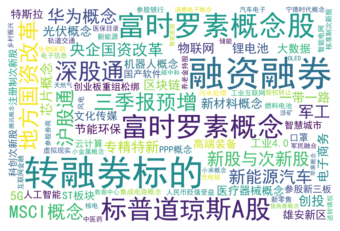

In [14]:
import jieba
import collections
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import future
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np


#new_data = HangYe["所属概念"].values
new_data = gainian[gainian!=None]
#newdata="".join(new_data)
#seg_list = jieba.cut(newdata , cut_all=True)
# 筛选后统计
word_counts = collections.Counter(new_data)
# 获取前100最高频的词
word_counts_top100 = word_counts.most_common(100)
print(word_counts_top100)

# 绘制词云
my_cloud = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=100,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=99,         # 设置字体最大值
    min_font_size=16,         # 设置子图最小值
    random_state=50           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(word_counts)

# 显示生成的词云图片
plt.imshow(my_cloud, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.show()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LPXHYC~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.698 seconds.
Prefix dict has been built successfully.


[('概念', 7654), ('融券', 4289), ('富', 2478), ('时', 2459), ('罗素', 2459), ('转', 2360), ('融资', 2230), ('标的', 2143), ('改革', 1991), ('国资', 1820), ('股', 1527), ('新股', 1423), ('概念股', 1380), ('通', 1254), ('普', 1093), ('道琼斯', 1093), ('琼斯', 1093), ('A股', 1093), ('标', 1038), ('联网', 966), ('新', 962), ('次新股', 949), ('汽车', 906), ('智能', 843), ('深', 840), ('能源', 820), ('地方', 755), ('方国', 755), ('电子', 739), ('三季', 682), ('季报', 682), ('预', 682), ('新能源', 681), ('参股', 664), ('增', 628), ('沪', 603), ('华为', 558), ('MSCI', 546), ('工业', 541), ('军工', 498), ('电池', 498), ('央', 490), ('企', 490), ('医疗', 488), ('与', 474), ('互联', 474), ('互联网', 474), ('芯片', 465), ('链', 387), ('材料', 371), ('机器', 370), ('节能', 365), ('金融', 363), ('国产', 354), ('医药', 348), ('数据', 343), ('新区', 343), ('物', 336), ('锂电', 332), ('处理', 326), ('专精', 320), ('特', 320), ('机器人', 319), ('光伏', 317), ('区块', 314), ('经济', 309), ('自贸区', 305), ('银行', 280), ('创投', 276), ('网络', 275), ('计算', 273), ('5G', 268), ('一带', 262), ('一路', 262), ('雄', 260), ('环保', 252), ('

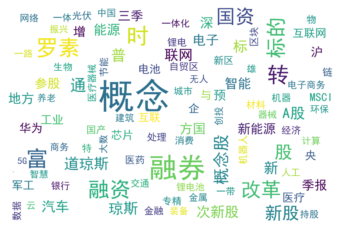

In [10]:
import jieba
import collections
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import future
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np


#new_data = HangYe["所属概念"].values
new_data = gainian[gainian!=None]
newdata="".join(new_data)
seg_list = jieba.cut(newdata , cut_all=True)
# 筛选后统计
word_counts = collections.Counter(seg_list)
# 获取前100最高频的词
word_counts_top100 = word_counts.most_common(100)
print(word_counts_top100)

# 绘制词云
my_cloud = WordCloud(
    background_color='white',  # 设置背景颜色  默认是black
    width=900, height=600,
    max_words=100,            # 词云显示的最大词语数量
    font_path='simhei.ttf',   # 设置字体  显示中文
    max_font_size=99,         # 设置字体最大值
    min_font_size=16,         # 设置子图最小值
    random_state=50           # 设置随机生成状态，即多少种配色方案
).generate_from_frequencies(word_counts)

# 显示生成的词云图片
plt.imshow(my_cloud, interpolation='bilinear')
# 显示设置词云图中无坐标轴
plt.axis('off')
plt.show()

In [ ]:
keyword=list(pd.DataFrame(word_counts_top100).iloc[12:,:][0])

In [ ]:
aa=''.join(keyword)

In [ ]:
aa

In [ ]:
seg_list = jieba.cut(aa, cut_all=True)

In [ ]:
print("Full Mode: " + "/ ".join(seg_list))

In [ ]:
seg_list = jieba.cut("我来到北京清华大学", cut_all=True)
print("Full Mode: " + "/ ".join(seg_list))  # 全模式